In [2]:
import matplotlib.pyplot as plt
import numpy as np
# import networkx as nx
import os
import pandas as pd
import time
import json

In [16]:
path = "../outputs"
f = "path_21946_infos.json"

In [17]:
with open(os.path.join(path,f),"r") as infile:
    infos = json.load(infile)

[4, 80]
[ 0.71646506  0.2549266  26.1549266  22.47044384]
{'init_graph': 0.0, 'add_nodes': 0.018, 'downsample': 0.0, 'set_cost_rest': 0.028, 'add_edges': 0.018, 'edge_list': 0.018, 'add_all_edges': 5.73, 'sum_of_costs': 0.569, 'shortest_path': 2.882, 'remove_edges': 0.589}
[2, 50]
[ 0.69723429  0.2549266  22.9649266  19.35837487]
{'init_graph': 0.0, 'add_nodes': 0.018, 'downsample': 0.0, 'set_cost_rest': 0.028, 'add_edges': 0.018, 'edge_list': 0.018, 'add_all_edges': 5.73, 'sum_of_costs': 0.569, 'shortest_path': 2.882, 'remove_edges': 0.589}
[1, 0]
[ 0.63954198  0.2549266  21.1449266  17.99630591]
{'init_graph': 0.0, 'add_nodes': 0.018, 'downsample': 0.0, 'set_cost_rest': 0.028, 'add_edges': 0.018, 'edge_list': 0.018, 'add_all_edges': 5.73, 'sum_of_costs': 0.569, 'shortest_path': 2.882, 'remove_edges': 0.589}


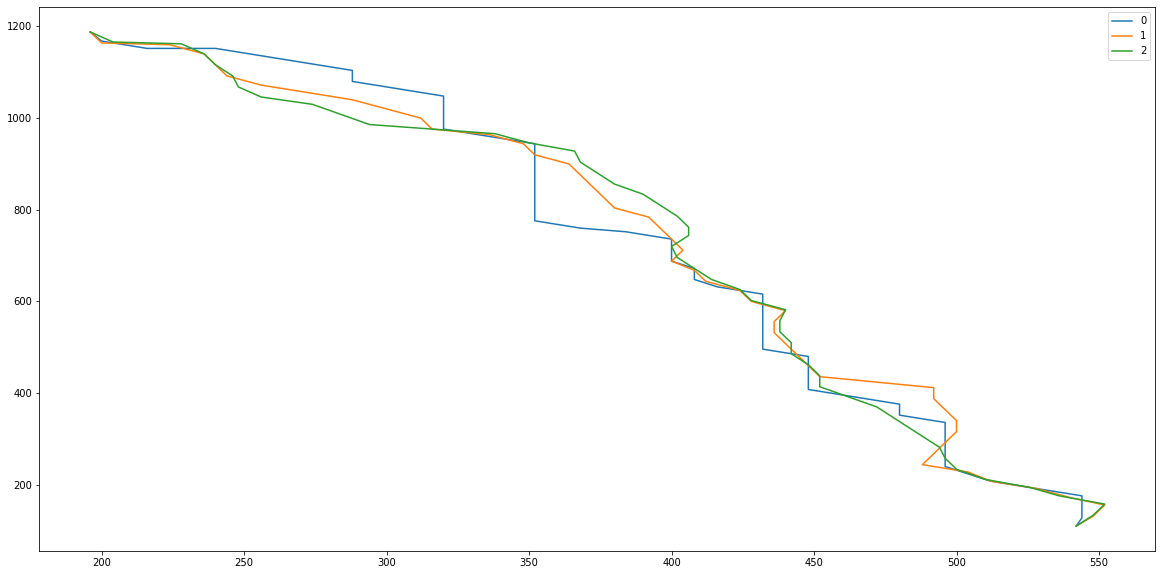

In [22]:
plt.figure(figsize=(20,10))
for i in range(len(infos["pipeline"])):
    print(infos["pipeline"][i])
    costs = np.array(infos["data"][i]["edgecosts"])
    path = np.array(infos["data"][i]["path_cells"])
    plt.plot(path[:,0], path[:,1], label=i)
    print(np.sum(costs, axis=0))
    print(infos["data"][i]["time_logs"])
plt.legend()
plt.show()

In [3]:
path = "../outputs"

In [4]:
times = pd.read_csv(os.path.join(path, "time_tests_compare1.csv"))

## Scale 2 comparison

In [5]:
direct = times[times["id"].str.contains("direct")]

In [6]:
overall_times = times[times["time_pipeline"]!=0]

In [7]:
out_costs = np.array([eval(c) for c in times["costs"]])

In [8]:
times["cost_sum"] = np.sum(out_costs, axis=1)

In [9]:
times.columns

Index(['id', 'scale', 'graphtool', 'graphtype', 'sample_factor', 'dist',
       'n_pixels', 'n_nodes', 'n_edges', 'add_nodes_time', 'add_edge_time',
       'shortest_path_time', 'costs', 'time_pipeline', 'notes', 'cost_sum'],
      dtype='object')

In [10]:
agg_dict = {"n_edges":"max", "add_edge_time":"max", "shortest_path_time":"max", "cost_sum":"min", "time_pipeline":"max"}
max_edges = times.groupby("id").agg(agg_dict).reset_index()

In [11]:
times.groupby('id')['dist'].apply(list)

id
line-5-pipe               [50, 0, 40, 0]
norm_1_pipe               [80, 50, 0, 0]
norm_2_direct                     [0, 0]
norm_2_pipe                          [0]
random_1_pipe               [200, 50, 0]
random_1_pipe2              [200, 50, 0]
random_2_pipe     [50, 0, 0, 200, 50, 0]
random_2_pipe2           [200, 50, 0, 0]
random_2_pipe3           [200, 50, 0, 0]
Name: dist, dtype: object

In [12]:
max_edges["dists"] = list(times.groupby('id')['dist'].apply(list))
max_edges["factos"] = list(times.groupby('id')['sample_factor'].apply(list))

In [13]:
max_edges

,id,n_edges,add_edge_time,shortest_path_time,cost_sum,time_pipeline,dists,factos
0,line-5-pipe,4426817,7.244,2.475,46.325,22.977,"[50, 0, 40, 0]","[0.9, 0.0, 0.9, 0.0]"
1,norm_1_pipe,46022750,56.947,20.413,36.380,364.541,"[80, 50, 0, 0]","[4.0, 2.0, 1.0, 1.0]"
2,norm_2_direct,15086011,8.582,6.003,40.036,40.892,"[0, 0]","[1.0, 1.0]"
3,norm_2_pipe,6255262,4.001,2.803,40.036,27.750,[0],[1.0]
4,random_1_pipe,52204849,103.990,25.229,36.006,634.532,"[200, 50, 0]","[0.95, 0.95, 0.0]"
5,random_1_pipe2,52960730,78.338,20.474,36.046,437.777,"[200, 50, 0]","[0.98, 0.98, 0.0]"
6,random_2_pipe,7542525,7.921,3.557,40.036,41.526,"[50, 0, 0, 200, 50, 0]","[0.9, 0.0, 0.0, 0.9, 0.99, 0.0]"
7,random_2_pipe2,7543705,7.592,4.659,40.036,57.524,"[200, 50, 0, 0]","[0.95, 0.95, 0.0, 0.0]"
8,random_2_pipe3,7543024,6.511,3.681,42.062,40.808,"[200, 50, 0, 0]","[0.95, 0.95, 0.9, 0.9]"


In [14]:
df_plot = times[["id", "cost_sum", ]]

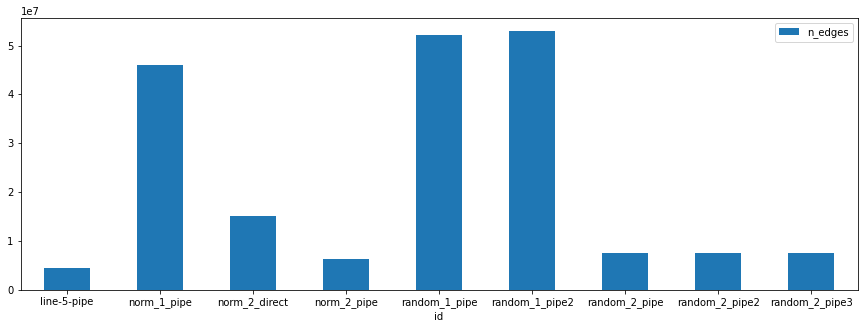

In [15]:
ax = max_edges.plot.bar(x='id', y='n_edges', rot=0, figsize=(15,5))


## Bar plot of costs

In [16]:
def plot_comparison(var):
    costs = times.groupby('id')[var].apply(list)
    co = np.array(costs)
    max_len = max([len(c) for c in co])
    new_list = [l + [l[-1] for _ in range(max_len-len(l))] for l in co]
    new_df = pd.DataFrame(data = new_list, columns=[str(i) for i in range(max_len)])
    new_df["id"] = np.unique(times["id"])
    ax = new_df.plot.bar(x='id',  figsize=(15,5))

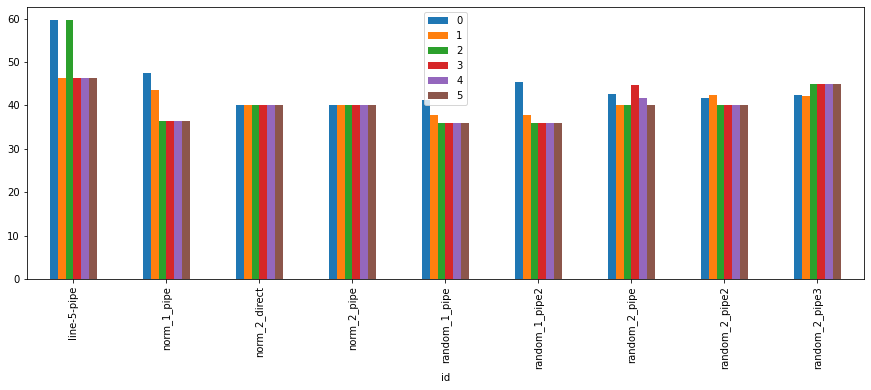

In [17]:
plot_comparison("cost_sum")

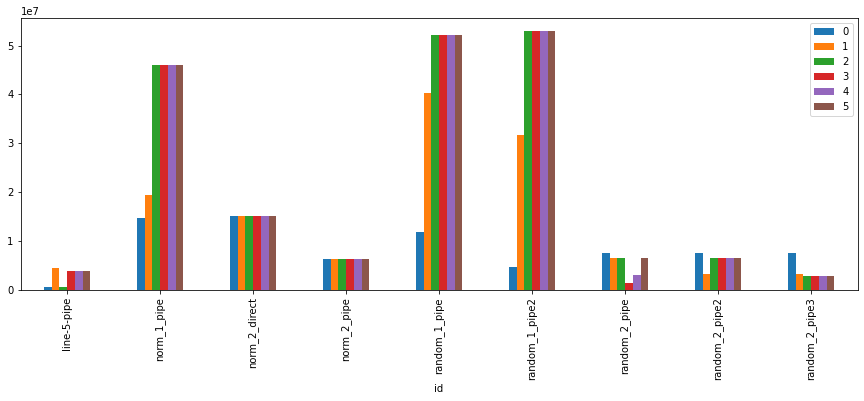

In [18]:
plot_comparison("n_edges")

## Check outputs qualitatively:

In [ ]:
instance_path = "/Users/ninawiedemann/Downloads/tifs_new/data_dump_1.dat"
with open(instance_path, "rb") as infile:
    data = pickle.load(infile)
(instance, instance_corr, start_inds, dest_inds) = data.data

In [ ]:
paths = []
for json_file in ["path_norm-1-direct_infos.json", "path_norm_1_pipe_infos.json", "path_random_1_pipe_infos.json"]:
    with open("../outputs/"+json_file, "r") as infile:
        infos = json.load(infile)
        print(json_file)
        costs = infos["data"][-1]["edgecosts"]
        print(np.sum(np.array(costs), axis=0), np.sum(np.array(costs)))
        paths.append(np.array(infos["data"][-1]["path_cells"]))

### Double check costs

In [ ]:
for i, path in enumerate(paths):
    costs = []
    for p in path:
        cost = instance[:, p[0], p[1]]
        costs.append(cost)
    print(np.sum(np.array(costs), axis=0))

### Color paths in image

In [ ]:
expanded = np.expand_dims(instance_corr*instance[2], axis=2)
expanded = np.tile(expanded, (1, 1, 3)) 
buffer = 2
for i, path in enumerate(paths[:3]):
    col = np.zeros(3)
    col[i] = 1
    for p in path:
        x = p[0]
        y = p[1]
        expanded[x - buffer:x + buffer + 1,
                 y - buffer:y + buffer + 1]  = col

In [ ]:
red = normal

green = norm pipe

blue = random pipe

In [ ]:
plt.figure(figsize=(10,20))
plt.imshow(np.swapaxes(expanded, 1, 0))